# Overview

O'reilly fit a linear model to calculate salaries. This notebook operationalizes the model.

30572 intercept
+1395 age (per year of age above 18)
+5911 bargaining skills (times 1 for “poor” skills
to 5 for “excellent” skills)
+382 work_week (times # hours in week)
-2007 gender=Female
+1759 industry=Software (incl. security, cloud services)
-891 industry=Retail / E-Commerce
-6336 industry=Education
+718 company size: 2500+
-448 company size: <500
+8606 PhD
+851 master’s degree (but no PhD)
+13200 California
+10097 Northeast US
-3695 UK/Ireland
-18353 Europe (except UK/I)
-23140 Latin America
-30139 Asia
+7819 Meetings: 1 - 3 hours / day
+9036 Meetings: 4+ hours / day
+2679 Basic exploratory data analysis: 1 - 4 hours / week
-4615 Basic exploratory data analysis: 4+ hours / day
+352 Data cleaning::1 - 4 hrs / week
+2287 cloud computing amount: Most or all cloud computing
-2710 cloud computing amount: Not using cloud computing
+9747 Spark
+6758 D3
+4878 Amazon Elastic MapReduce (EMR)
+3371 Scala
+2309 C++
+1173 Teradata
+625 Hive
-1931 Visual Basic/VBA
+31280 level: Principal
+15642 title: Architect
+3340 title: Data Scientist
+2819 title: Engineer
-3272 title: Developer
-4566 title: Analyst

In [57]:
def calculateSalaryEstimate(userFeatureDict, modelCoefficentDict):

    userVariableScores = {}
    userVariableScores['intercept'] = modelCoefficentDict['intercept']
    
    userScore = modelCoefficentDict['intercept']
    
    for featureKey in userFeatureDict.keys():
        variableScore = float(userFeatureDict[featureKey]) * modelCoefficentDict[featureKey]
        userScore = userScore + variableScore
        userVariableScores[featureKey] = variableScore
#         print('%s: user = %f, param = %f, variable score = %f, user score = %f', (featureKey, 
#                                                         userFeatureDict[featureKey], 
#                                                         modelCoefficentDict[featureKey], 
#                                                         variableScore,
#                                                         userScore))
    
    return [userScore, userVariableScores]

In [75]:
modelParamDict = {
        'intercept' : 30572,
        'age (per year of age above 18)' : 1395, 
        'bargaining skills' : 5911,
        'work_week' : 382,
        'gender=Female' : -2007,
        'industry=Software' : 1759,
        'industry=Retail / E-Commerce' : -891,
        'industry=Education' : -6336,
        'company size: 2500+' : 718,
        'company size: <500' : -448,
        'PhD' : 8606,
        'master’s degree (but no PhD)' : 851,
        'California' : 13200,
        'Northeast US' : 10097,
        'UK/Ireland' : -3695, 
        'Europe (except UK/I)' : -18353,
        'Latin America' : -23140,
        'Asia' : -30139,
        'Meetings: 1 - 3 hours / day' : 7819,
        'Meetings: 4+ hours / day' : 9036,
        'Basic exploratory data analysis: 1 - 4 hours / week' : 2679,
        'Basic exploratory data analysis: 4+ hours / day' : -4615,
        'Data cleaning::1 - 4 hrs / week' : 352,
        'cloud computing amount: Most or all cloud computing' : 2287,
        'cloud computing amount: Not using cloud computing' : -2710,
        'Spark' : 9747,
        'D3' : 6758,
        'Amazon Elastic MapReduce (EMR)' : 4878,
        'Scala' : 3371,
        'C++' : 2309,
        'Teradata' : 1173,
        'Hive' : 625,
        'Visual Basic/VBA' : -1931,
        'level: Principal' : 31280,
        'title: Architect' : 15642,
        'title: Data Scientist' : 3340,
        'title: Engineer' : 2819,
        'title: Developer' : -3272,
        'title: Analyst' : -4566
    }
    
    
userDict = {
        'age (per year of age above 18)' : 41-18, 
        'bargaining skills' : 3,
        'work_week' : 40,
        'gender=Female' : 0,
        'industry=Software' : 1,
        'company size: <500' : 1,
        'PhD' : 1,
        'California' : 1,
        'Meetings: 1 - 3 hours / day' : 1,
        'Basic exploratory data analysis: 1 - 4 hours / week' : 1,
        'Data cleaning::1 - 4 hrs / week' : 1,
        'cloud computing amount: Most or all cloud computing' : 1,
        'Spark' : 1,
        'title: Data Scientist' : 1
    }

predictedSalary, coefficients = calculateSalaryEstimate(userDict, modelParamDict)

print("Predicted salary = %f" % predictedSalary)

Predicted salary = 145011.000000


# Breakdown

In [76]:
sortedCoefficients = sorted([(k, v) for k,v in coefficients.items()], key= lambda x: x[1], reverse=True)
sortedCoefficients

[('age (per year of age above 18)', 32085.0),
 ('intercept', 30572),
 ('bargaining skills', 17733.0),
 ('work_week', 15280.0),
 ('California', 13200.0),
 ('Spark', 9747.0),
 ('PhD', 8606.0),
 ('Meetings: 1 - 3 hours / day', 7819.0),
 ('title: Data Scientist', 3340.0),
 ('Basic exploratory data analysis: 1 - 4 hours / week', 2679.0),
 ('cloud computing amount: Most or all cloud computing', 2287.0),
 ('industry=Software', 1759.0),
 ('Data cleaning::1 - 4 hrs / week', 352.0),
 ('gender=Female', -0.0),
 ('company size: <500', -448.0)]

# Visualize

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

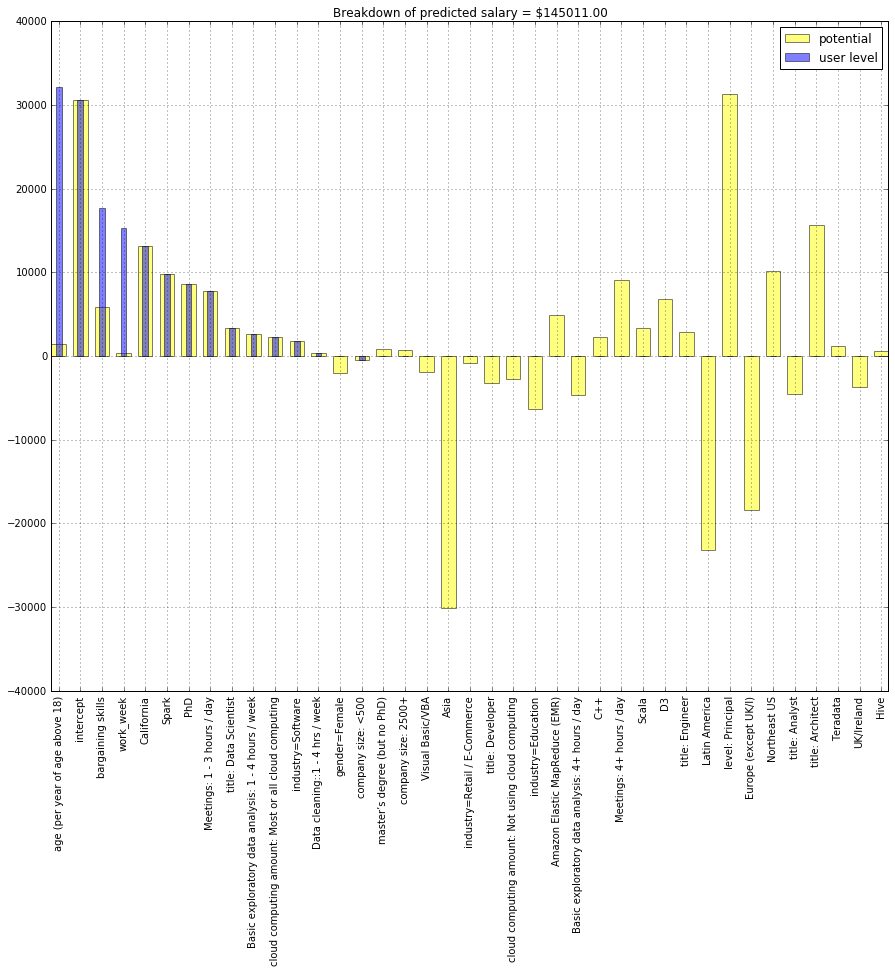

In [79]:
labels = [x[0] for x in sortedCoefficients]

unspecifiedUserFeatures = [x for x in modelParamDict.keys() if x not in labels]
labels = labels + unspecifiedUserFeatures

x = range(0, 3*len(labels), 3)
y = [x[1] for x in sortedCoefficients] + list(np.zeros(len(labels) - len(sortedCoefficients)))

potentialy = [modelParamDict[label] for label in labels]



plt.figure(figsize=(15, 12))
plt.bar(left = x, height = potentialy, width=2, tick_label = labels, align='center', color='yellow', alpha=.5, label='potential')
plt.bar(left = x, height = y, tick_label = labels, align='center', alpha =.5, label='user level')
plt.xticks(rotation=90)
plt.grid()
plt.legend(loc='best')

plt.title('Breakdown of predicted salary = $%.2f' % predictedSalary)